- Generate weekly statistics (mean, median, mode) for number of new cases and deaths across Texas.

- Compare the data against other states (compare against 5 states). Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?

- Identify five counties within a state of your choice with high cases and death rates.

- Plot weekly trends (new cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. 

- Describe what is causing them and what were the peaks. Do the counties follow state pattern.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
pd.options.plotting.backend = "plotly"

After reading in the confirmed covid cases, drop all Statewide Unallocated rows and drop every state except for Texas. Then, drop the first 5 rows to keep only the cases. Do the same on deaths.

In [2]:
cases = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
cases = cases.drop(cases.index[cases['countyFIPS'] == 0])
cases = cases.drop(cases.index[cases['State'] != 'TX'])
cases = cases.drop(cases.iloc[:, 0:4], axis=1)
cases

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
2567,0,0,0,0,0,0,0,0,0,0,...,6273,6273,6273,6293,6318,6318,6306,6364,6364,6364
2568,0,0,0,0,0,0,0,0,0,0,...,1911,1911,1911,1933,1933,1966,1966,1966,1966,1966
2569,0,0,0,0,0,0,0,0,0,0,...,9419,9419,9530,9530,9530,9530,9839,9839,9988,9988
2570,0,0,0,0,0,0,0,0,0,0,...,1545,1566,1566,1588,1624,1648,1665,1683,1698,1698
2571,0,0,0,0,0,0,0,0,0,0,...,838,838,838,847,850,850,851,854,854,854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,0,0,0,0,0,0,0,0,0,0,...,3857,3857,3857,3857,3943,3943,3943,4017,4017,4017
2817,0,0,0,0,0,0,0,0,0,0,...,880,880,880,900,903,903,938,938,938,938
2818,0,0,0,0,0,0,0,0,0,0,...,2263,2263,2263,2274,2278,2287,2298,2305,2305,2305
2819,0,0,0,0,0,0,0,0,0,0,...,1843,1843,1843,1844,1861,1875,1878,1884,1885,1885


In [3]:
deaths = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
deaths = deaths.drop(deaths.index[deaths['countyFIPS'] == 0])
deaths = deaths.drop(deaths.index[deaths['State'] != 'TX'])
deaths = deaths.drop(deaths.iloc[:, 0:4], axis=1)
deaths

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
2567,0,0,0,0,0,0,0,0,0,0,...,134,134,134,135,135,135,135,135,135,135
2568,0,0,0,0,0,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,47
2569,0,0,0,0,0,0,0,0,0,0,...,291,291,291,291,292,292,292,294,294,294
2570,0,0,0,0,0,0,0,0,0,0,...,46,46,46,46,46,46,46,46,46,46
2571,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,0,0,0,0,0,0,0,0,0,0,...,131,133,133,134,134,134,134,134,134,134
2817,0,0,0,0,0,0,0,0,0,0,...,28,28,28,28,28,28,29,29,29,29
2818,0,0,0,0,0,0,0,0,0,0,...,45,45,45,45,45,45,45,45,45,45
2819,0,0,0,0,0,0,0,0,0,0,...,36,36,36,36,36,38,38,38,38,38


Generate the differences to place into new_cases and new_deaths to represent the new cases and deaths daily. 

In [4]:
new_cases = pd.DataFrame()

for column in range(1,573):
  new_cases[column] = cases.iloc[:,column] - cases.iloc[:,column-1] 

new_cases

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/2936257275.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_cases[column] = cases.iloc[:,column] - cases.iloc[:,column-1]


,1,2,3,4,5,6,7,8,9,10,...,563,564,565,566,567,568,569,570,571,572
2567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,20,25,0,-12,58,0,0
2568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,22,0,33,0,0,0,0
2569,0,0,0,0,0,0,0,0,0,0,...,0,0,111,0,0,0,309,0,149,0
2570,0,0,0,0,0,0,0,0,0,0,...,20,21,0,22,36,24,17,18,15,0
2571,0,0,0,0,0,0,0,0,0,0,...,1,0,0,9,3,0,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,86,0,0,74,0,0
2817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,20,3,0,35,0,0,0
2818,0,0,0,0,0,0,0,0,0,0,...,9,0,0,11,4,9,11,7,0,0
2819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,17,14,3,6,1,0


In [5]:
new_deaths = pd.DataFrame()

for column in range(1,573):
  new_deaths[column] = deaths.iloc[:,column] - deaths.iloc[:,column-1] 

new_deaths

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/3068862066.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_deaths[column] = deaths.iloc[:,column] - deaths.iloc[:,column-1]


,1,2,3,4,5,6,7,8,9,10,...,563,564,565,566,567,568,569,570,571,572
2567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,0,0
2570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
2817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


Generate the weekly statistics

In [6]:
week_cases = pd.DataFrame()
week_cases = new_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_cases

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
2567,0,0,0,0,0,0,0,0,0,0,...,21,-8,5,-5,9,24,-70,47,41,71
2568,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,18,8,16,12,39,33
2569,0,0,0,0,0,0,0,0,0,4,...,5,17,8,0,66,63,109,219,368,458
2570,0,0,0,0,0,0,0,0,0,0,...,3,7,15,8,26,50,47,45,120,110
2571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,4,0,4,9,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,0,0,0,0,0,0,0,0,0,0,...,16,13,12,7,44,46,27,159,62,160
2817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,20,38
2818,0,0,0,0,0,0,0,0,0,1,...,1,7,2,6,-4,10,8,26,36,31
2819,0,0,0,0,0,0,0,0,0,0,...,3,4,8,6,5,10,8,7,8,41


In [7]:
week_deaths = pd.DataFrame()
week_deaths = new_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_deaths

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
2567,0,0,0,0,0,0,0,0,0,0,...,2,1,2,0,0,0,0,1,1,0
2568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2569,0,0,0,0,0,0,0,0,0,0,...,2,0,1,0,1,0,0,1,2,3
2570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,3,0
2571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,3,0
2817,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


Get the average number of cases and deaths per week.

In [8]:
avg_cases = pd.DataFrame()
avg_cases = pd.DataFrame(week_cases.mean(axis=0).round())
avg_cases.columns = ['Cases_avg']
avg_cases

,Cases_avg
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
77,93.0
78,160.0
79,282.0
80,386.0


In [9]:
avg_deaths = pd.DataFrame()
avg_deaths = pd.DataFrame(week_deaths.mean(axis=0).round())
avg_deaths.columns = ['Deaths_avg']

In [10]:
merged_avg = avg_cases.join(avg_deaths)
merged_avg.describe()

,Cases_avg,Deaths_avg
count,82.000000,82.000000
mean,159.841463,2.573171
std,171.242264,2.403857
min,0.000000,0.000000
25%,35.250000,1.000000
50%,107.000000,2.000000
75%,215.000000,4.000000
max,955.000000,9.000000


Compare the data against other states. Perform the same calculations on North Carolina 'NC', Tennessee 'TN', Montana 'MT', California 'CA', and Washington 'WA'.
First up, NC.

In [11]:
cases_nc = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
cases_nc = cases_nc.drop(cases_nc.index[cases_nc['countyFIPS'] == 0])
cases_nc = cases_nc.drop(cases_nc.index[cases_nc['State'] != 'NC'])
cases_nc = cases_nc.drop(cases_nc.iloc[:, 0:4], axis=1)

deaths_nc = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
deaths_nc = deaths_nc.drop(deaths_nc.index[deaths_nc['countyFIPS'] == 0])
deaths_nc = deaths_nc.drop(deaths_nc.index[deaths_nc['State'] != 'NC'])
deaths_nc = deaths_nc.drop(deaths_nc.iloc[:, 0:4], axis=1)

new_cases_nc = pd.DataFrame()

for column in range(1,573):
  new_cases_nc[column] = cases_nc.iloc[:,column] - cases_nc.iloc[:,column-1] 

new_deaths_nc = pd.DataFrame()

for column in range(1,573):
  new_deaths_nc[column] = deaths_nc.iloc[:,column] - deaths_nc.iloc[:,column-1] 

week_cases_nc = pd.DataFrame()
week_cases_nc = new_cases_nc.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_deaths_nc = pd.DataFrame()
week_deaths_nc = new_deaths_nc.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_cases_nc = pd.DataFrame()
avg_cases_nc = pd.DataFrame(week_cases_nc.mean(axis=0).round())
avg_cases_nc.columns = ['Cases_avg']
avg_deaths_nc = pd.DataFrame()
avg_deaths_nc = pd.DataFrame(week_deaths_nc.mean(axis=0).round())
avg_deaths_nc.columns = ['Deaths_avg']

merged_avg_nc = avg_cases_nc.join(avg_deaths_nc)
merged_avg_nc.describe()

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/1999508096.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_cases_nc[column] = cases_nc.iloc[:,column] - cases_nc.iloc[:,column-1]
C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/1999508096.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_deaths_nc[column] = deaths_nc.iloc[:,column] - deaths_nc.iloc[:,column-1]


,Cases_avg,Deaths_avg
count,82.000000,82.000000
mean,136.865854,1.658537
std,134.689562,1.517141
min,0.000000,0.000000
25%,33.250000,1.000000
50%,112.000000,1.000000
75%,164.000000,2.000000
max,606.000000,6.000000


Tennessee 'TN'

In [12]:
cases_tn = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
cases_tn = cases_tn.drop(cases_tn.index[cases_tn['countyFIPS'] == 0])
cases_tn = cases_tn.drop(cases_tn.index[cases_tn['State'] != 'TN'])
cases_tn = cases_tn.drop(cases_tn.iloc[:, 0:4], axis=1)

deaths_tn = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
deaths_tn = deaths_tn.drop(deaths_tn.index[deaths_tn['countyFIPS'] == 0])
deaths_tn = deaths_tn.drop(deaths_tn.index[deaths_tn['State'] != 'TN'])
deaths_tn = deaths_tn.drop(deaths_tn.iloc[:, 0:4], axis=1)

new_cases_tn = pd.DataFrame()

for column in range(1,573):
  new_cases_tn[column] = cases_tn.iloc[:,column] - cases_tn.iloc[:,column-1] 

new_deaths_tn = pd.DataFrame()

for column in range(1,573):
  new_deaths_tn[column] = deaths_tn.iloc[:,column] - deaths_tn.iloc[:,column-1] 

week_cases_tn = pd.DataFrame()
week_cases_tn = new_cases_tn.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_deaths_tn = pd.DataFrame()
week_deaths_tn = new_deaths_tn.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_cases_tn = pd.DataFrame()
avg_cases_tn = pd.DataFrame(week_cases_tn.mean(axis=0).round())
avg_cases_tn.columns = ['Cases_avg']
avg_deaths_tn = pd.DataFrame()
avg_deaths_tn = pd.DataFrame(week_deaths_tn.mean(axis=0).round())
avg_deaths_tn.columns = ['Deaths_avg']

merged_avg_tn = avg_cases_tn.join(avg_deaths_tn)
merged_avg_tn.describe()

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/2314306587.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_cases_tn[column] = cases_tn.iloc[:,column] - cases_tn.iloc[:,column-1]
C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/2314306587.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_deaths_tn[column] = deaths_tn.iloc[:,column] - deaths_tn.iloc[:,column-1]


,Cases_avg,Deaths_avg
count,82.000000,82.000000
mean,118.048780,1.646341
std,125.871961,1.964952
min,0.000000,0.000000
25%,27.000000,0.000000
50%,87.500000,1.000000
75%,150.500000,2.000000
max,586.000000,8.000000


Montana 'MT'

In [13]:
cases_mt = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
cases_mt = cases_mt.drop(cases_mt.index[cases_mt['countyFIPS'] == 0])
cases_mt = cases_mt.drop(cases_mt.index[cases_mt['State'] != 'MT'])
cases_mt = cases_mt.drop(cases_mt.iloc[:, 0:4], axis=1)

deaths_mt = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
deaths_mt = deaths_mt.drop(deaths_mt.index[deaths_mt['countyFIPS'] == 0])
deaths_mt = deaths_mt.drop(deaths_mt.index[deaths_mt['State'] != 'MT'])
deaths_mt = deaths_mt.drop(deaths_mt.iloc[:, 0:4], axis=1)

new_cases_mt = pd.DataFrame()

for column in range(1,573):
  new_cases_mt[column] = cases_mt.iloc[:,column] - cases_mt.iloc[:,column-1] 

new_deaths_mt = pd.DataFrame()

for column in range(1,573):
  new_deaths_mt[column] = deaths_mt.iloc[:,column] - deaths_mt.iloc[:,column-1] 

week_cases_mt = pd.DataFrame()
week_cases_mt = new_cases_mt.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_deaths_mt = pd.DataFrame()
week_deaths_mt = new_deaths_mt.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_cases_mt = pd.DataFrame()
avg_cases_mt = pd.DataFrame(week_cases_mt.mean(axis=0).round())
avg_cases_mt.columns = ['Cases_avg']
avg_deaths_mt = pd.DataFrame()
avg_deaths_mt = pd.DataFrame(week_deaths_mt.mean(axis=0).round())
avg_deaths_mt.columns = ['Deaths_avg']

merged_avg_mt = avg_cases_mt.join(avg_deaths_mt)
merged_avg_mt.describe()


C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/2670476077.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_cases_mt[column] = cases_mt.iloc[:,column] - cases_mt.iloc[:,column-1]
C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/2670476077.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_deaths_mt[column] = deaths_mt.iloc[:,column] - deaths_mt.iloc[:,column-1]


,Cases_avg,Deaths_avg
count,82.000000,82.000000
mean,26.207317,0.256098
std,34.174837,0.516660
min,0.000000,0.000000
25%,2.250000,0.000000
50%,14.000000,0.000000
75%,30.250000,0.000000
max,149.000000,2.000000


California 'CA'

In [14]:
cases_ca = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
cases_ca = cases_ca.drop(cases_ca.index[cases_ca['countyFIPS'] == 0])
cases_ca = cases_ca.drop(cases_ca.index[cases_ca['State'] != 'CA'])
cases_ca = cases_ca.drop(cases_ca.iloc[:, 0:4], axis=1)

deaths_ca = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
deaths_ca = deaths_ca.drop(deaths_ca.index[deaths_ca['countyFIPS'] == 0])
deaths_ca = deaths_ca.drop(deaths_ca.index[deaths_ca['State'] != 'CA'])
deaths_ca = deaths_ca.drop(deaths_ca.iloc[:, 0:4], axis=1)

new_cases_ca = pd.DataFrame()

for column in range(1,573):
  new_cases_ca[column] = cases_ca.iloc[:,column] - cases_ca.iloc[:,column-1] 

new_deaths_ca = pd.DataFrame()

for column in range(1,573):
  new_deaths_ca[column] = deaths_ca.iloc[:,column] - deaths_ca.iloc[:,column-1] 

week_cases_ca = pd.DataFrame()
week_cases_ca = new_cases_ca.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_deaths_ca = pd.DataFrame()
week_deaths_ca = new_deaths_ca.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_cases_ca = pd.DataFrame()
avg_cases_ca = pd.DataFrame(week_cases_ca.mean(axis=0).round())
avg_cases_ca.columns = ['Cases_avg']
avg_deaths_ca = pd.DataFrame()
avg_deaths_ca = pd.DataFrame(week_deaths_ca.mean(axis=0).round())
avg_deaths_ca.columns = ['Deaths_avg']

merged_avg_ca = avg_cases_ca.join(avg_deaths_ca)
merged_avg_ca.describe()


C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/3112475625.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_cases_ca[column] = cases_ca.iloc[:,column] - cases_ca.iloc[:,column-1]
C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/3112475625.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_deaths_ca[column] = deaths_ca.iloc[:,column] - deaths_ca.iloc[:,column-1]


,Cases_avg,Deaths_avg
count,82.000000,82.000000
mean,848.000000,13.451220
std,1196.897656,15.787284
min,0.000000,-2.000000
25%,175.500000,5.000000
50%,382.500000,8.000000
75%,1010.750000,14.750000
max,5260.000000,66.000000


Washington 'WA'

In [15]:
cases_wa = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
cases_wa = cases_wa.drop(cases_wa.index[cases_wa['countyFIPS'] == 0])
cases_wa = cases_wa.drop(cases_wa.index[cases_wa['State'] != 'WA'])
cases_wa = cases_wa.drop(cases_wa.iloc[:, 0:4], axis=1)

deaths_wa = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
deaths_wa = deaths_wa.drop(deaths_wa.index[deaths_wa['countyFIPS'] == 0])
deaths_wa = deaths_wa.drop(deaths_wa.index[deaths_wa['State'] != 'WA'])
deaths_wa = deaths_wa.drop(deaths_wa.iloc[:, 0:4], axis=1)

new_cases_wa = pd.DataFrame()

for column in range(1,573):
  new_cases_wa[column] = cases_wa.iloc[:,column] - cases_wa.iloc[:,column-1] 

new_deaths_wa = pd.DataFrame()

for column in range(1,573):
  new_deaths_wa[column] = deaths_wa.iloc[:,column] - deaths_wa.iloc[:,column-1] 

week_cases_wa = pd.DataFrame()
week_cases_wa = new_cases_wa.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_deaths_wa = pd.DataFrame()
week_deaths_wa = new_deaths_wa.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_cases_wa = pd.DataFrame()
avg_cases_wa = pd.DataFrame(week_cases_wa.mean(axis=0).round())
avg_cases_wa.columns = ['Cases_avg']
avg_deaths_wa = pd.DataFrame()
avg_deaths_wa = pd.DataFrame(week_deaths_wa.mean(axis=0).round())
avg_deaths_wa.columns = ['Deaths_avg']

merged_avg_wa = avg_cases_wa.join(avg_deaths_wa)
merged_avg_wa.describe()


C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/3146001754.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_cases_wa[column] = cases_wa.iloc[:,column] - cases_wa.iloc[:,column-1]
C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/3146001754.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_deaths_wa[column] = deaths_wa.iloc[:,column] - deaths_wa.iloc[:,column-1]


,Cases_avg,Deaths_avg
count,82.000000,82.00000
mean,160.463415,1.97561
std,161.639684,1.77065
min,-134.000000,-1.00000
25%,64.250000,1.00000
50%,120.000000,2.00000
75%,207.000000,2.00000
max,925.000000,11.00000


Normalize every state with the population of that state * 1000

In [16]:
# Texas Normalizing
merged_avg['Cases_avg'] = merged_avg['Cases_avg'].apply(lambda x: x/(29000000000))
merged_avg['Deaths_avg'] = merged_avg['Deaths_avg'].apply(lambda x: x/(29000000000))
# North Carolina Normalizing
merged_avg_nc['Cases_avg'] = merged_avg_nc['Cases_avg'].apply(lambda x: x/(10490000000))
merged_avg_nc['Deaths_avg'] = merged_avg_nc['Deaths_avg'].apply(lambda x: x/(10490000000))
# Tennessee Normalizing
merged_avg_tn['Cases_avg'] = merged_avg_tn['Cases_avg'].apply(lambda x: x/(6829000000))
merged_avg_tn['Deaths_avg'] = merged_avg_tn['Deaths_avg'].apply(lambda x: x/(6829000000))
# Montana Normalizing
merged_avg_mt['Cases_avg'] = merged_avg_mt['Cases_avg'].apply(lambda x: x/(1069000000))
merged_avg_mt['Deaths_avg'] = merged_avg_mt['Deaths_avg'].apply(lambda x: x/(1069000000))
# California Normalizing
merged_avg_ca['Cases_avg'] = merged_avg_ca['Cases_avg'].apply(lambda x: x/(39510000000))
merged_avg_ca['Deaths_avg'] = merged_avg_ca['Deaths_avg'].apply(lambda x: x/(39510000000))
# Washington Normalizing
merged_avg_wa['Cases_avg'] = merged_avg_wa['Cases_avg'].apply(lambda x: x/(7615000000))
merged_avg_wa['Deaths_avg'] = merged_avg_wa['Deaths_avg'].apply(lambda x: x/(7615000000))

Graph all states' cases on one graph

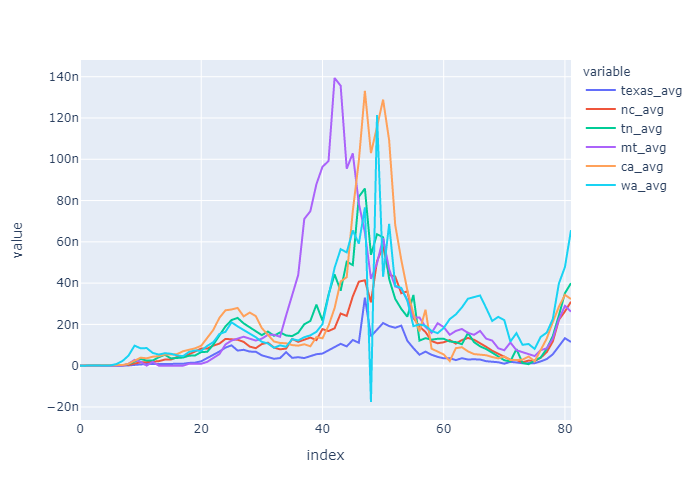

In [40]:
cases_merged = pd.DataFrame()
cases_merged['texas_avg'] = merged_avg['Cases_avg']
cases_merged['nc_avg'] = merged_avg_nc['Cases_avg']
cases_merged['tn_avg'] = merged_avg_tn['Cases_avg']
cases_merged['mt_avg'] = merged_avg_mt['Cases_avg']
cases_merged['ca_avg'] = merged_avg_ca['Cases_avg']
cases_merged['wa_avg'] = merged_avg_wa['Cases_avg']
casesImage = cases_merged.plot(kind='line')
cases_bytes = casesImage.to_image(format='png')
Image(cases_bytes)

The graph of the US and this one see very similar rises and falls. For instance, on this plot showing a peak at about week 25 (July 15, 2020) and week 42 (November 11, 2020), the US averages show a similar peak right around the same time. The rates, however, are not the same. Some states show massive increases in cases in short amounts of time. There could be many reasons for this, but one can assume that states with high-density cities would cause higher rates of infection in those cities. States that are more spread out are less prone to those massive increases. However, some states may show high infection rates whenever the state government loosens health restrictions.

Identify five counties in the state of Texas with high cases and deaths.
- Harris County (pop: 4,731,145)
- Dallas County (pop: 2,613,539)
- Tarrant County (pop: 2,110,640)
- Bexar County (pop: 2,009,324)
- Travis County (pop: 1,290,188)

Gather the raw values and logged values of the data before plotting it

In [18]:
cases_harris = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
cases_harris = cases_harris.drop(cases_harris.index[cases_harris['countyFIPS'] != 48113])
cases_harris = cases_harris.drop(cases_harris.iloc[:, 0:4], axis=1)

deaths_harris = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
deaths_harris = deaths_harris.drop(deaths_harris.index[deaths_harris['countyFIPS'] != 48113])
deaths_harris = deaths_harris.drop(deaths_harris.iloc[:, 0:4], axis=1)

new_cases_harris = pd.DataFrame()

for column in range(1,573):
  new_cases_harris[column] = cases_harris.iloc[:,column] - cases_harris.iloc[:,column-1] 

new_deaths_harris = pd.DataFrame()

for column in range(1,573):
  new_deaths_harris[column] = deaths_harris.iloc[:,column] - deaths_harris.iloc[:,column-1] 

week_cases_harris = pd.DataFrame()
week_cases_harris = new_cases_harris.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_deaths_harris = pd.DataFrame()
week_deaths_harris = new_deaths_harris.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_cases_harris = pd.DataFrame()
avg_cases_harris = pd.DataFrame(week_cases_harris.mean(axis=0).round())
avg_cases_harris.columns = ['Cases_avg']
avg_deaths_harris = pd.DataFrame()
avg_deaths_harris = pd.DataFrame(week_deaths_harris.mean(axis=0).round())
avg_deaths_harris.columns = ['Deaths_avg']

merged_avg_harris = avg_cases_harris.join(avg_deaths_harris)

# Harris County Log Normalizing
merged_avg_harris_logd = pd.DataFrame()
merged_avg_harris_logd['Cases_avg'] = merged_avg_harris['Cases_avg'].apply(lambda x: np.log(x))
merged_avg_harris_logd['Deaths_avg'] = merged_avg_harris['Deaths_avg'].apply(lambda x: np.log(x))

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/3364356796.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/3364356796.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



Dallas County

In [19]:
cases_dallas = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
cases_dallas = cases_dallas.drop(cases_dallas.index[cases_dallas['countyFIPS'] != 48201])
cases_dallas = cases_dallas.drop(cases_dallas.iloc[:, 0:4], axis=1)

deaths_dallas = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
deaths_dallas = deaths_dallas.drop(deaths_dallas.index[deaths_dallas['countyFIPS'] != 48201])
deaths_dallas = deaths_dallas.drop(deaths_dallas.iloc[:, 0:4], axis=1)

new_cases_dallas = pd.DataFrame()

for column in range(1,573):
  new_cases_dallas[column] = cases_dallas.iloc[:,column] - cases_dallas.iloc[:,column-1] 

new_deaths_dallas = pd.DataFrame()

for column in range(1,573):
  new_deaths_dallas[column] = deaths_dallas.iloc[:,column] - deaths_dallas.iloc[:,column-1] 

week_cases_dallas = pd.DataFrame()
week_cases_dallas = new_cases_dallas.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_deaths_dallas = pd.DataFrame()
week_deaths_dallas = new_deaths_dallas.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_cases_dallas = pd.DataFrame()
avg_cases_dallas = pd.DataFrame(week_cases_dallas.mean(axis=0).round())
avg_cases_dallas.columns = ['Cases_avg']
avg_deaths_dallas = pd.DataFrame()
avg_deaths_dallas = pd.DataFrame(week_deaths_dallas.mean(axis=0).round())
avg_deaths_dallas.columns = ['Deaths_avg']

merged_avg_dallas = avg_cases_dallas.join(avg_deaths_dallas)

# Dallas County Log Normalizing
merged_avg_dallas_logd = pd.DataFrame()
merged_avg_dallas_logd['Cases_avg'] = merged_avg_dallas['Cases_avg'].apply(lambda x: np.log(x))
merged_avg_dallas_logd['Deaths_avg'] = merged_avg_dallas['Deaths_avg'].apply(lambda x: np.log(x))

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/461081428.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/461081428.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



Tarrant County

In [20]:
cases_tarrant = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
cases_tarrant = cases_tarrant.drop(cases_tarrant.index[cases_tarrant['countyFIPS'] != 48439])
cases_tarrant = cases_tarrant.drop(cases_tarrant.iloc[:, 0:4], axis=1)

deaths_tarrant = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
deaths_tarrant = deaths_tarrant.drop(deaths_tarrant.index[deaths_tarrant['countyFIPS'] != 48439])
deaths_tarrant = deaths_tarrant.drop(deaths_tarrant.iloc[:, 0:4], axis=1)

new_cases_tarrant = pd.DataFrame()

for column in range(1,573):
  new_cases_tarrant[column] = cases_tarrant.iloc[:,column] - cases_tarrant.iloc[:,column-1] 

new_deaths_tarrant = pd.DataFrame()

for column in range(1,573):
  new_deaths_tarrant[column] = deaths_tarrant.iloc[:,column] - deaths_tarrant.iloc[:,column-1] 

week_cases_tarrant = pd.DataFrame()
week_cases_tarrant = new_cases_tarrant.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_deaths_tarrant = pd.DataFrame()
week_deaths_tarrant = new_deaths_tarrant.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_cases_tarrant = pd.DataFrame()
avg_cases_tarrant = pd.DataFrame(week_cases_tarrant.mean(axis=0).round())
avg_cases_tarrant.columns = ['Cases_avg']
avg_deaths_tarrant = pd.DataFrame()
avg_deaths_tarrant = pd.DataFrame(week_deaths_tarrant.mean(axis=0).round())
avg_deaths_tarrant.columns = ['Deaths_avg']

merged_avg_tarrant = avg_cases_tarrant.join(avg_deaths_tarrant)

# Tarrant County Log Normalizing
merged_avg_tarrant_logd = pd.DataFrame()
merged_avg_tarrant_logd['Cases_avg'] = merged_avg_tarrant['Cases_avg'].apply(lambda x: np.log(x))
merged_avg_tarrant_logd['Deaths_avg'] = merged_avg_tarrant['Deaths_avg'].apply(lambda x: np.log(x))

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/3132549777.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/3132549777.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



Bexar County

In [21]:
cases_bexar = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
cases_bexar = cases_bexar.drop(cases_bexar.index[cases_bexar['countyFIPS'] != 48029])
cases_bexar = cases_bexar.drop(cases_bexar.iloc[:, 0:4], axis=1)

deaths_bexar = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
deaths_bexar = deaths_bexar.drop(deaths_bexar.index[deaths_bexar['countyFIPS'] != 48029])
deaths_bexar = deaths_bexar.drop(deaths_bexar.iloc[:, 0:4], axis=1)

new_cases_bexar = pd.DataFrame()

for column in range(1,573):
  new_cases_bexar[column] = cases_bexar.iloc[:,column] - cases_bexar.iloc[:,column-1] 

new_deaths_bexar = pd.DataFrame()

for column in range(1,573):
  new_deaths_bexar[column] = deaths_bexar.iloc[:,column] - deaths_bexar.iloc[:,column-1] 

week_cases_bexar = pd.DataFrame()
week_cases_bexar = new_cases_bexar.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_deaths_bexar = pd.DataFrame()
week_deaths_bexar = new_deaths_bexar.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_cases_bexar = pd.DataFrame()
avg_cases_bexar = pd.DataFrame(week_cases_bexar.mean(axis=0).round())
avg_cases_bexar.columns = ['Cases_avg']
avg_deaths_bexar = pd.DataFrame()
avg_deaths_bexar = pd.DataFrame(week_deaths_bexar.mean(axis=0).round())
avg_deaths_bexar.columns = ['Deaths_avg']

merged_avg_bexar = avg_cases_bexar.join(avg_deaths_bexar)

# Bexar County Log Normalizing
merged_avg_bexar_logd = pd.DataFrame()
merged_avg_bexar_logd['Cases_avg'] = merged_avg_bexar['Cases_avg'].apply(lambda x: np.log(x))
merged_avg_bexar_logd['Deaths_avg'] = merged_avg_bexar['Deaths_avg'].apply(lambda x: np.log(x))

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/1915062757.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/1915062757.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



Travis County

In [22]:
cases_travis = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
cases_travis = cases_travis.drop(cases_travis.index[cases_travis['countyFIPS'] != 48453])
cases_travis = cases_travis.drop(cases_travis.iloc[:, 0:4], axis=1)

deaths_travis = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
deaths_travis = deaths_travis.drop(deaths_travis.index[deaths_travis['countyFIPS'] != 48453])
deaths_travis = deaths_travis.drop(deaths_travis.iloc[:, 0:4], axis=1)

new_cases_travis = pd.DataFrame()

for column in range(1,573):
  new_cases_travis[column] = cases_travis.iloc[:,column] - cases_travis.iloc[:,column-1] 

new_deaths_travis = pd.DataFrame()

for column in range(1,573):
  new_deaths_travis[column] = deaths_travis.iloc[:,column] - deaths_travis.iloc[:,column-1] 

week_cases_travis = pd.DataFrame()
week_cases_travis = new_cases_travis.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_deaths_travis = pd.DataFrame()
week_deaths_travis = new_deaths_travis.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_cases_travis = pd.DataFrame()
avg_cases_travis = pd.DataFrame(week_cases_travis.mean(axis=0).round())
avg_cases_travis.columns = ['Cases_avg']
avg_deaths_travis = pd.DataFrame()
avg_deaths_travis = pd.DataFrame(week_deaths_travis.mean(axis=0).round())
avg_deaths_travis.columns = ['Deaths_avg']

merged_avg_travis = avg_cases_travis.join(avg_deaths_travis)

# Travis County Log Normalizing
merged_avg_travis_logd = pd.DataFrame()
merged_avg_travis_logd['Cases_avg'] = merged_avg_travis['Cases_avg'].apply(lambda x: np.log(x))
merged_avg_travis_logd['Deaths_avg'] = merged_avg_travis['Deaths_avg'].apply(lambda x: np.log(x))

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/875265608.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\sageb\AppData\Local\Temp/ipykernel_32208/875265608.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



Plot the data's raw values and logged values

Harris County

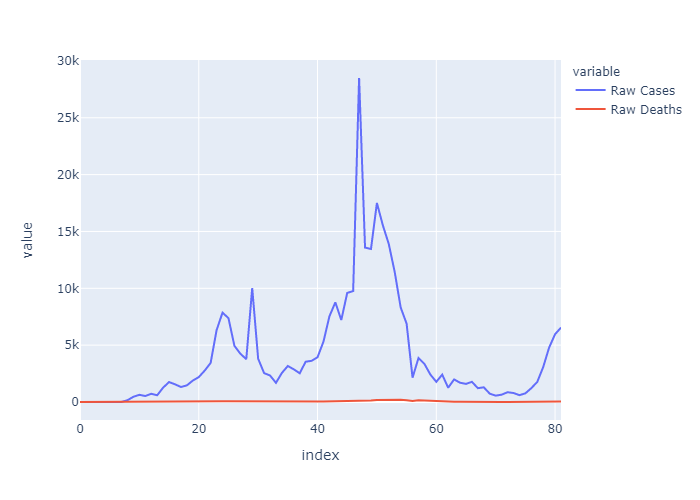

In [38]:
harris_county_raw = pd.DataFrame()
harris_county_raw['Raw Cases'] = merged_avg_harris['Cases_avg']
harris_county_raw['Raw Deaths'] = merged_avg_harris['Deaths_avg']
harris_county_log = pd.DataFrame()
harris_county_log['Log Cases'] = merged_avg_harris_logd['Cases_avg']
harris_county_log['Log Deaths'] = merged_avg_harris_logd['Deaths_avg']

rawImage = harris_county_raw.plot(kind='line')
logImage = harris_county_log.plot(kind='line')
raw_bytes = rawImage.to_image(format='png')
log_bytes = logImage.to_image(format='png')
Image(raw_bytes)

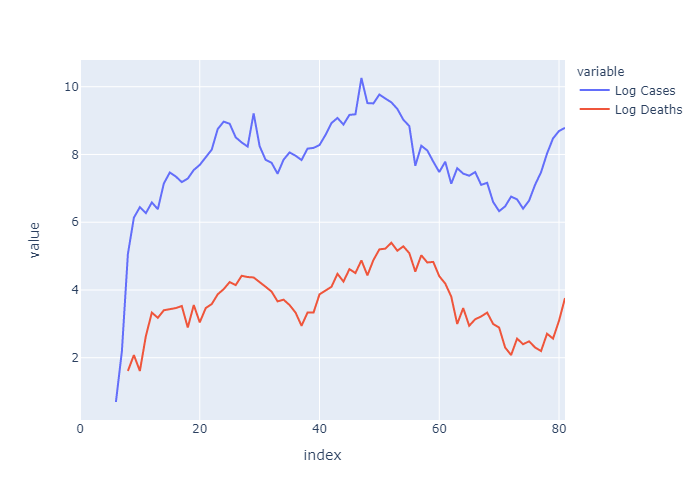

In [39]:
Image(log_bytes)

Dallas County

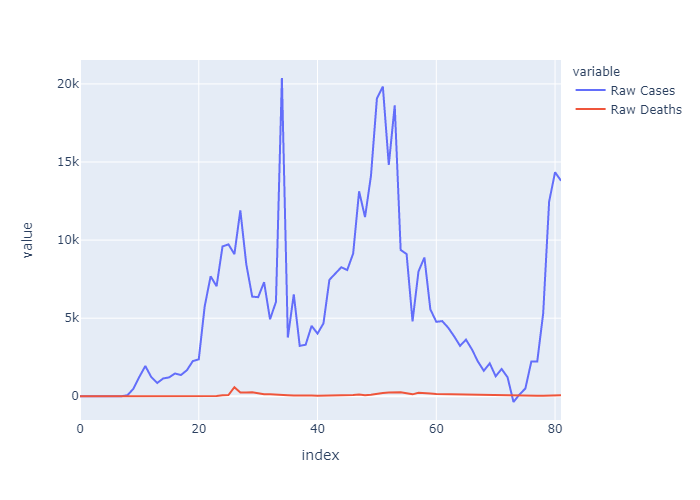

In [36]:
dallas_county_raw = pd.DataFrame()
dallas_county_raw['Raw Cases'] = merged_avg_dallas['Cases_avg']
dallas_county_raw['Raw Deaths'] = merged_avg_dallas['Deaths_avg']
dallas_county_log = pd.DataFrame()
dallas_county_log['Log Cases'] = merged_avg_dallas_logd['Cases_avg']
dallas_county_log['Log Deaths'] = merged_avg_dallas_logd['Deaths_avg']

rawImage = dallas_county_raw.plot(kind='line')
logImage = dallas_county_log.plot(kind='line')
raw_bytes = rawImage.to_image(format='png')
log_bytes = logImage.to_image(format='png')
Image(raw_bytes)

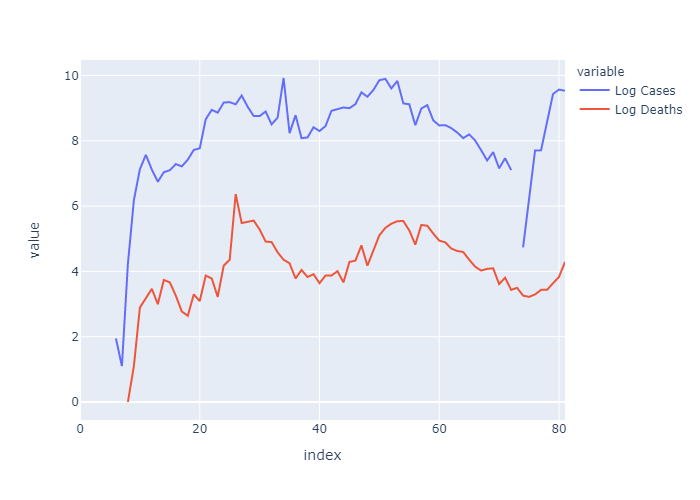

In [37]:
Image(log_bytes)

Tarrant County

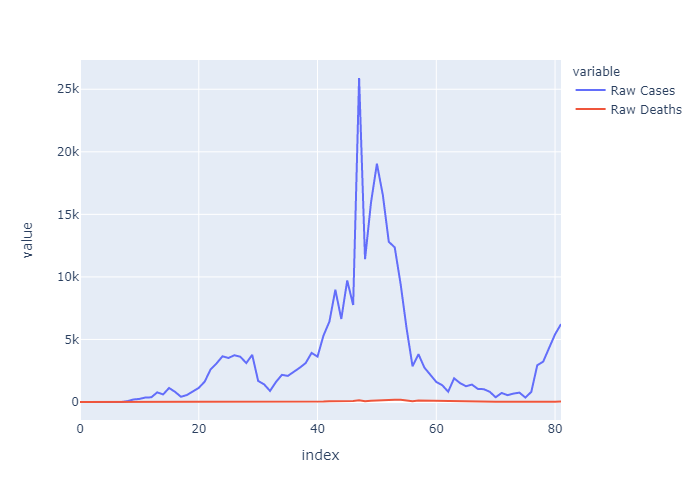

In [34]:
tarrant_county_raw = pd.DataFrame()
tarrant_county_raw['Raw Cases'] = merged_avg_tarrant['Cases_avg']
tarrant_county_raw['Raw Deaths'] = merged_avg_tarrant['Deaths_avg']
tarrant_county_log = pd.DataFrame()
tarrant_county_log['Log Cases'] = merged_avg_tarrant_logd['Cases_avg']
tarrant_county_log['Log Deaths'] = merged_avg_tarrant_logd['Deaths_avg']

rawImage = tarrant_county_raw.plot(kind='line')
logImage = tarrant_county_log.plot(kind='line')
raw_bytes = rawImage.to_image(format='png')
log_bytes = logImage.to_image(format='png')
Image(raw_bytes)

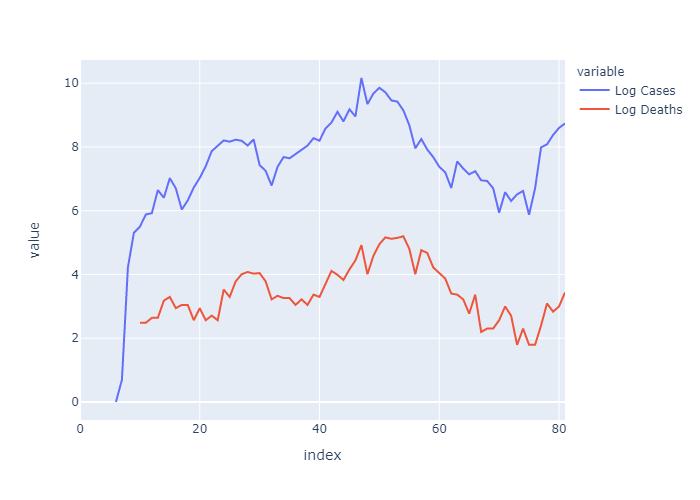

In [35]:
Image(log_bytes)

Bexar County

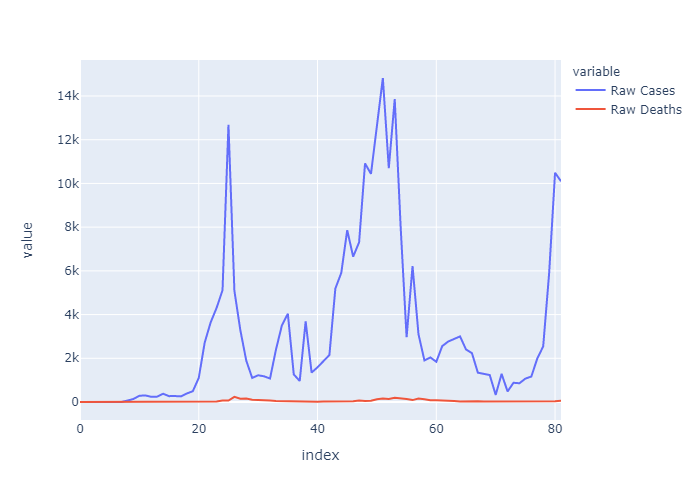

In [32]:
bexar_county_raw = pd.DataFrame()
bexar_county_raw['Raw Cases'] = merged_avg_bexar['Cases_avg']
bexar_county_raw['Raw Deaths'] = merged_avg_bexar['Deaths_avg']
bexar_county_log = pd.DataFrame()
bexar_county_log['Log Cases'] = merged_avg_bexar_logd['Cases_avg']
bexar_county_log['Log Deaths'] = merged_avg_bexar_logd['Deaths_avg']

rawImage = bexar_county_raw.plot(kind='line')
logImage = bexar_county_log.plot(kind='line')
raw_bytes = rawImage.to_image(format='png')
log_bytes = logImage.to_image(format='png')
Image(raw_bytes)

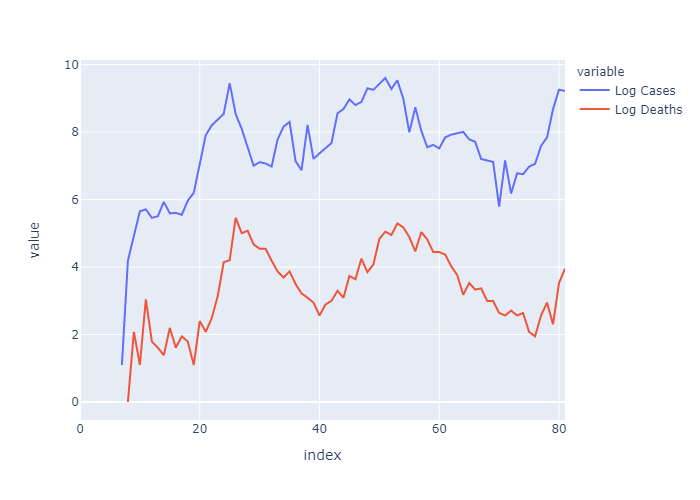

In [33]:
Image(log_bytes)

Travis County

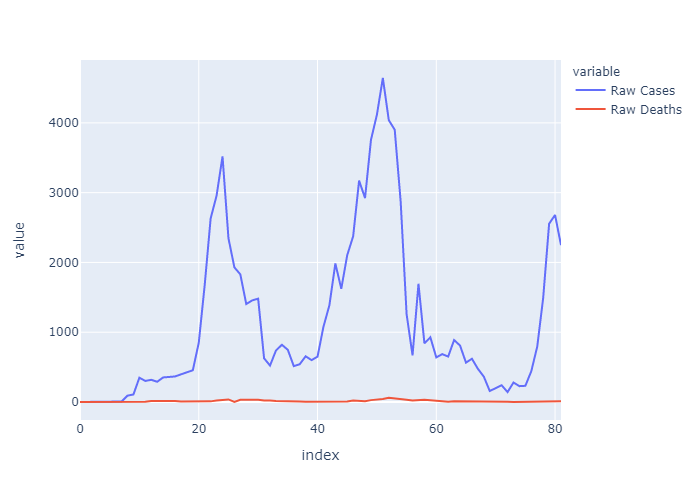

In [30]:
travis_county_raw = pd.DataFrame()
travis_county_raw['Raw Cases'] = merged_avg_travis['Cases_avg']
travis_county_raw['Raw Deaths'] = merged_avg_travis['Deaths_avg']
travis_county_log = pd.DataFrame()
travis_county_log['Log Cases'] = merged_avg_travis_logd['Cases_avg']
travis_county_log['Log Deaths'] = merged_avg_travis_logd['Deaths_avg']

rawImage = travis_county_raw.plot(kind='line')
logImage = travis_county_log.plot(kind='line')
raw_bytes = rawImage.to_image(format='png')
log_bytes = logImage.to_image(format='png')
Image(raw_bytes)

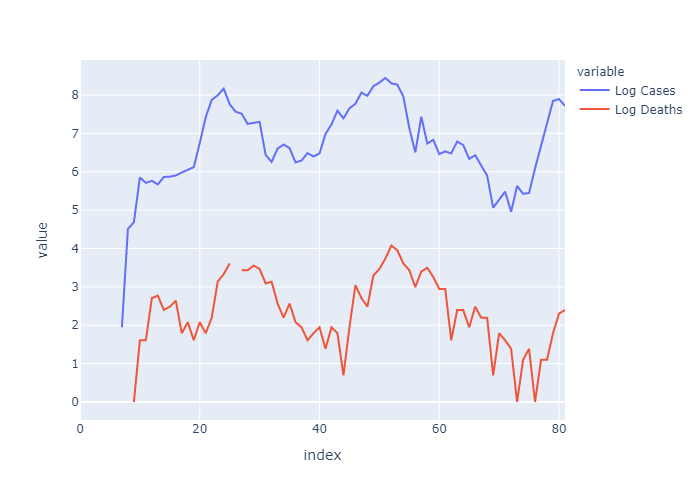

In [31]:
Image(log_bytes)

Each of the plots shown exhibit similar characteristics as the weeks shown in the Texas plot. For instance, there are peaks in all of the data at around week 25 and week 42. Week 25 was the week of July 15, 2020, which was around the time that Texas began to resinstate mask mandates and health protocols after the government loosened health restrictions prior to (https://www.texastribune.org/2021/07/15/coronavirus-texas-austin-protocols/). Week 42 was the week of November 11, 2020. At this time, Texas became the first state to hit 1M total COVID19 cases (https://www.cnn.com/world/live-news/coronavirus-pandemic-11-11-20-intl/h_b70f3bf5ba506f15ef6a0e0c7b6ec683). 